# Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

# Functions and constants

In [2]:
def get_prediction(A,gamma,g,d,rhos,rhof):
    return (A*(rhos/rhof*g*d+gamma/rhof/d))**0.5

def get_loss(params_fit,u_data,g,d,rhos,rhof):
    A,gamma = params_fit
    u_pred = get_prediction(A,gamma,g,d,rhos,rhof)
    return u_data/u_pred-1

def get_r2(x,y):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    return 1-np.sum(residuals**2)/np.sum((y-np.mean(y))**2)

# Read data

In [3]:
data_spreadsheet = pd.read_csv('SI_table3.csv')
u = data_spreadsheet['u_*'][1:].astype(float)
g = data_spreadsheet['g'][1:].astype(float)
d = data_spreadsheet['d'][1:].astype(float)
rhos = data_spreadsheet['rho_s'][1:].astype(float)
rhof = data_spreadsheet['rho_f'][1:].astype(float)
ref  = data_spreadsheet['ref'][1:].astype(str)

In [4]:
# https://doi.org/10.1029/2000JD900304
A_sl00 = 0.0123
gamma_sl00 = 3e-4

# https://doi.org/10.1038/s41550-022-01669-0
g_venus = 8.88
rhos_venus = 3000
rhof_venus = 58

# Analysis

In [5]:
A_init,gamma_init = 1e-2,1e-4

fit = least_squares(get_loss,[A_init,gamma_init],args=[u,g,d,rhos,rhof],verbose=2)
A_fit, gamma_fit = fit.x
print(A_fit, gamma_fit)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2152e+02                                    9.70e+05    
       1              2         3.0890e+01      9.06e+01       6.32e-03       1.70e+05    
       2              3         2.1045e+01      9.85e+00       4.00e-03       1.90e+04    
       3              4         2.0786e+01      2.59e-01       9.33e-04       2.58e+02    
       4              5         2.0785e+01      3.76e-04       7.07e-05       3.84e+01    
       5              6         2.0785e+01      1.48e-06       3.38e-06       5.10e+00    
       6              7         2.0785e+01      2.30e-08       5.02e-07       7.21e-01    
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 1.2152e+02, final cost 2.0785e+01, first-order optimality 7.21e-01.
0.0213164659929916 0.00018045937956857227


In [6]:
u_subset = u[ref=='greeley1984']
d_subset = d[ref=='greeley1984']
g_subset = g[ref=='greeley1984'].iloc[0]
rhos_subset = rhos[ref=='greeley1984'].iloc[0]
rhof_subset = rhof[ref=='greeley1984'].iloc[0]

fit_subset = least_squares(get_loss,[1e-2,1e-4],args=[u_subset,g_subset,d_subset,rhos_subset,rhof_subset],verbose=2)
A_fit_subset, gamma_fit_subset = fit_subset.x
print(A_fit_subset, gamma_fit_subset)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4916e+00                                    1.36e+04    
       1              2         1.8278e-01      1.31e+00       6.96e-03       3.95e+03    
       2              3         1.7927e-02      1.65e-01       5.08e-03       6.65e+02    
       3              4         1.2249e-02      5.68e-03       1.34e-03       2.88e+01    
       4              5         1.2238e-02      1.08e-05       6.19e-05       3.89e-02    
       5              6         1.2238e-02      3.85e-11       1.76e-07       1.16e-03    
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.4916e+00, final cost 1.2238e-02, first-order optimality 1.16e-03.
0.02344534982000361 8.627461723743897e-05


# Plots

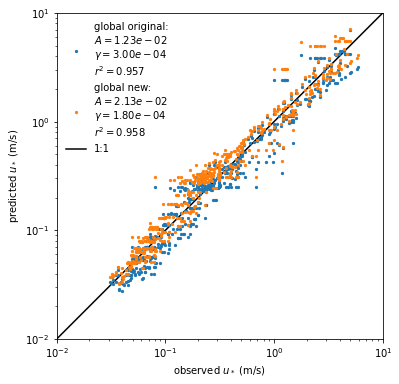

In [7]:
ss = 5
fig = plt.gcf()
plt.scatter(u,get_prediction(A_sl00,gamma_sl00,g,d,rhos,rhof),s=ss,label='global original:\n$A=%.2e$\n$\\gamma=%.2e$\n$r^2=%.3f$'%(A_sl00,gamma_sl00,get_r2(np.log10(u),np.log10(get_prediction(A_sl00,gamma_sl00,g,d,rhos,rhof)))))
plt.scatter(u,get_prediction(A_fit,gamma_fit,g,d,rhos,rhof),s=ss,label='global new:\n$A=%.2e$\n$\\gamma=%.2e$\n$r^2=%.3f$'%(A_fit,gamma_fit,get_r2(np.log10(u),np.log10(get_prediction(A_fit,gamma_fit,g,d,rhos,rhof)))))
plt.plot([1e-2,1e+1],[1e-2,1e+1],'k',label='1:1',zorder=-1)
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-2,1e+1)
plt.ylim(1e-2,1e+1)
plt.xlabel('observed $u_*$ (m/s)')
plt.ylabel('predicted $u_*$ (m/s)')
plt.legend(frameon=False)
fig.set_size_inches(6,6)

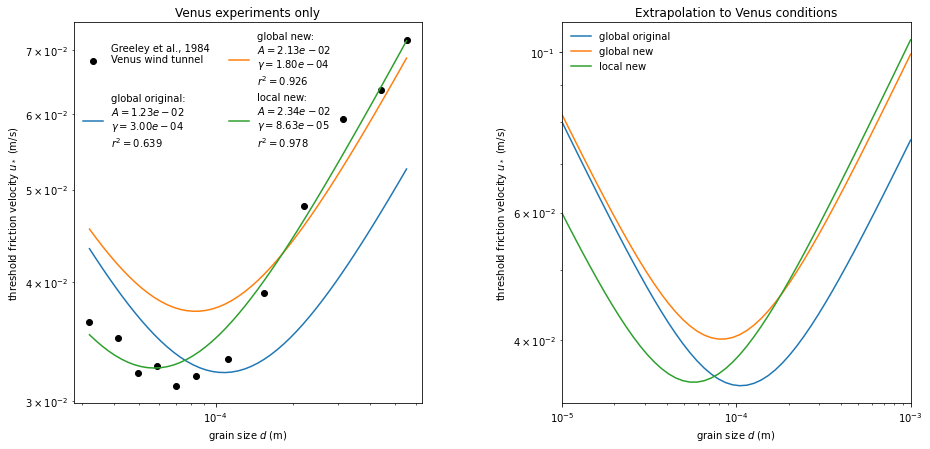

In [8]:
fig = plt.gcf()

plt.subplot(121)
plt.scatter(d_subset,u_subset,c='k',label='\nGreeley et al., 1984\nVenus wind tunnel\n\n')

dtemp = np.logspace(np.log10(np.min(d_subset)),np.log10(np.max(d_subset)))
plt.plot(dtemp,get_prediction(A_sl00,gamma_sl00,g_subset,dtemp,rhos_subset,rhof_subset),label='global original:\n$A=%.2e$\n$\\gamma=%.2e$\n$r^2=%.3f$'%(A_sl00,gamma_sl00,get_r2(np.log10(u_subset),np.log10(get_prediction(A_sl00,gamma_sl00,g_subset,d_subset,rhos_subset,rhof_subset)))))
plt.plot(dtemp,get_prediction(A_fit,gamma_fit,g_subset,dtemp,rhos_subset,rhof_subset),label='global new:\n$A=%.2e$\n$\\gamma=%.2e$\n$r^2=%.3f$'%(A_fit,gamma_fit,get_r2(np.log10(u_subset),np.log10(get_prediction(A_fit,gamma_fit,g_subset,d_subset,rhos_subset,rhof_subset)))))
plt.plot(dtemp,get_prediction(A_fit_subset,gamma_fit_subset,g_subset,dtemp,rhos_subset,rhof_subset),label='local new:\n$A=%.2e$\n$\\gamma=%.2e$\n$r^2=%.3f$'%(A_fit_subset,gamma_fit_subset,get_r2(np.log10(u_subset),np.log10(get_prediction(A_fit_subset,gamma_fit_subset,g_subset,d_subset,rhos_subset,rhof_subset)))))

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False,ncol=2)
plt.xlabel('grain size $d$ (m)')
plt.ylabel('threshold friction velocity $u_*$ (m/s)')
plt.title('Venus experiments only')

plt.subplot(122)

dtemp = np.logspace(-5,-3)
plt.plot(dtemp,get_prediction(A_sl00,gamma_sl00,g_venus,dtemp,rhos_venus,rhof_venus),label='global original')
plt.plot(dtemp,get_prediction(A_fit,gamma_fit,g_venus,dtemp,rhos_venus,rhof_venus),label='global new')
plt.plot(dtemp,get_prediction(A_fit_subset,gamma_fit_subset,g_venus,dtemp,rhos_venus,rhof_venus),label='local new')

plt.xscale('log')
plt.yscale('log')
plt.xlim(dtemp[0],dtemp[-1])
plt.legend(frameon=False)
plt.xlabel('grain size $d$ (m)')
plt.ylabel('threshold friction velocity $u_*$ (m/s)')
plt.title('Extrapolation to Venus conditions')

plt.subplots_adjust(wspace=0.4)
fig.set_size_inches(15,7)

In [9]:
Anvals = 30
gammanvals = 30
Ainit = np.logspace(-5,1,Anvals)
gammainit = np.logspace(-7,-1,gammanvals)

Afitinit = np.empty((Anvals,gammanvals))
gammafitinit = np.empty((Anvals,gammanvals))
costfitinit = np.empty((Anvals,gammanvals))
r2fitinit = np.empty((Anvals,gammanvals))

for i in range(Anvals):
    for j in range(gammanvals):
        fit = least_squares(get_loss,[Ainit[i],gammainit[j]],args=[u,g,d,rhos,rhof])
        Afitinit[i,j], gammafitinit[i,j] = fit.x
        costfitinit[i,j] = fit.cost
        r2fitinit[i,j] = get_r2(np.log10(u),np.log10(get_prediction(Afitinit[i,j],gammafitinit[i,j],g,d,rhos,rhof)))

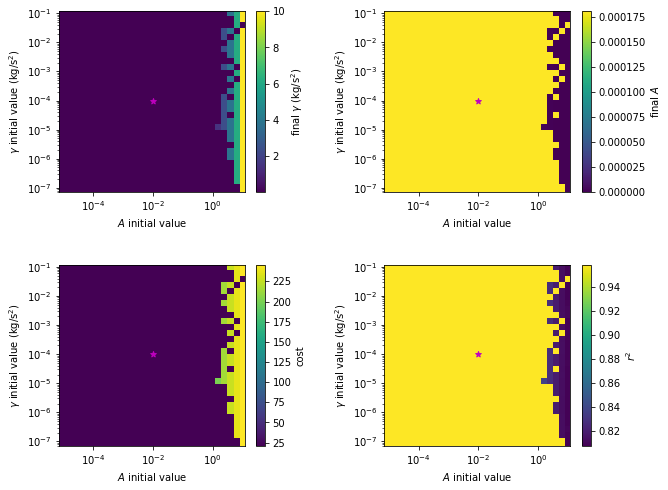

In [10]:
abspercentile = 50

fig = plt.gcf()

plt.subplot(221)
plt.pcolormesh(Ainit,gammainit,Afitinit.T,vmin=np.percentile(Afitinit,50-abspercentile),vmax=np.percentile(Afitinit,50+abspercentile))
plt.colorbar(label='final $\\gamma$ (kg/s$^2$)')
plt.scatter(A_init,gamma_init,marker='*',c='m')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$A$ initial value')
plt.ylabel('$\\gamma$ initial value (kg/s$^2$)')

plt.subplot(222)
plt.pcolormesh(Ainit,gammainit,gammafitinit.T,vmin=np.percentile(gammafitinit,50-abspercentile),vmax=np.percentile(gammafitinit,50+abspercentile))
plt.colorbar(label='final $A$')
plt.scatter(A_init,gamma_init,marker='*',c='m')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$A$ initial value')
plt.ylabel('$\\gamma$ initial value (kg/s$^2$)')

plt.subplot(223)
plt.pcolormesh(Ainit,gammainit,costfitinit.T,vmin=np.percentile(costfitinit,50-abspercentile),vmax=np.percentile(costfitinit,50+abspercentile))
plt.colorbar(label='cost')
plt.scatter(A_init,gamma_init,marker='*',c='m')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$A$ initial value')
plt.ylabel('$\\gamma$ initial value (kg/s$^2$)')

plt.subplot(224)
plt.pcolormesh(Ainit,gammainit,r2fitinit.T,vmin=np.percentile(r2fitinit,50-abspercentile),vmax=np.percentile(r2fitinit,50+abspercentile))
plt.colorbar(label='$r^2$')
plt.scatter(A_init,gamma_init,marker='*',c='m')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$A$ initial value')
plt.ylabel('$\\gamma$ initial value (kg/s$^2$)')

plt.subplots_adjust(wspace=0.4,hspace=0.4)
fig.set_size_inches(10,8)